<a href="https://colab.research.google.com/github/congltk1234/Fashion_Items_Classification/blob/main/FashionMNIST/NeuronsNetwork_FashionMNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -U tensorflow_datasets

import tensorflow as tf
# Import TensorFlow Datasets
import tensorflow_datasets as tfds
tfds.disable_progress_bar()

# Helper libraries
import math
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

In [3]:
dataset, metadata = tfds.load('fashion_mnist', as_supervised=True, with_info=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

Dataset fashion_mnist downloaded and prepared to /root/tensorflow_datasets/fashion_mnist/3.0.1. Subsequent calls will reuse this data.


In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal',      'Shirt',   'Sneaker',  'Bag',   'Ankle boot']

In [5]:
num_train_examples = metadata.splits['train'].num_examples
num_test_examples = metadata.splits['test'].num_examples
print("Number of training examples: {}".format(num_train_examples))
print("Number of test examples:     {}".format(num_test_examples))

Number of training examples: 60000
Number of test examples:     10000


In [6]:
def normalize(images, labels):
  images = tf.cast(images, tf.float32)
  images /= 255
  return images, labels

# The map function applies the normalize function to each element in the train
# and test datasets
train_dataset =  train_dataset.map(normalize)
test_dataset  =  test_dataset.map(normalize)

# The first time you use the dataset, the images will be loaded from disk
# Caching will keep them in memory, making training faster
train_dataset =  train_dataset.cache()

train_size = int(0.8 * num_train_examples)
val_size = int(0.2 * num_train_examples)

val_dataset = train_dataset.skip(train_size)
val_dataset = val_dataset.cache()
train_dataset = train_dataset.take(train_size)

test_dataset  =  test_dataset.cache()

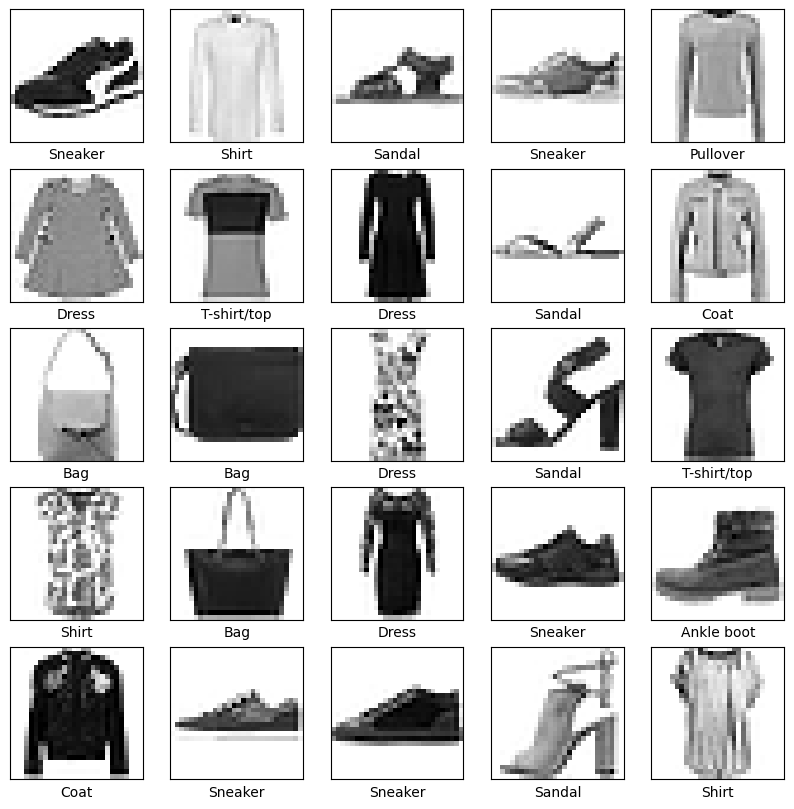

In [7]:
plt.figure(figsize=(10,10))
i = 0
for (image, label) in val_dataset.take(25):
    image = image.numpy().reshape((28,28))
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(image, cmap=plt.cm.binary)
    plt.xlabel(class_names[label])
    i += 1
plt.show()

In [8]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28, 1)),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

# Display the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


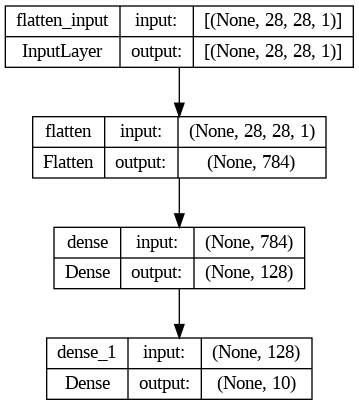

In [9]:
from keras.utils import plot_model
plot_model(model, to_file='ANN.png', show_shapes=True, show_layer_names=True)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.7/993.7 kB 5.0 MB/s eta 0:00:00


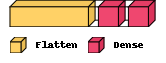

In [10]:
!pip install visualkeras

import visualkeras
visualkeras.layered_view(model, legend=True)

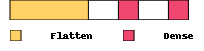

In [11]:
visualkeras.layered_view(model, legend=True, draw_volume=False,spacing=30)

In [12]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [13]:
BATCH_SIZE = 32
epoch = 10
train_dataset = train_dataset.cache().repeat().shuffle(num_train_examples).batch(BATCH_SIZE)
val_dataset = val_dataset.cache().batch(BATCH_SIZE)

In [14]:
history = model.fit(train_dataset, epochs=epoch,
                    steps_per_epoch=math.ceil(num_train_examples/BATCH_SIZE),
                    validation_data=val_dataset,
                    validation_steps=len(val_dataset) // BATCH_SIZE)

Epoch 1/10
1875/1875 [==============================] - 29s 11ms/step - loss: 0.4937 - accuracy: 0.8263 - val_loss: 0.3974 - val_accuracy: 0.8494
Epoch 2/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3659 - accuracy: 0.8694 - val_loss: 0.2960 - val_accuracy: 0.8835
Epoch 3/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3286 - accuracy: 0.8788 - val_loss: 0.2785 - val_accuracy: 0.8892
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3074 - accuracy: 0.8893 - val_loss: 0.2632 - val_accuracy: 0.9062
Epoch 5/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.2846 - accuracy: 0.8941 - val_loss: 0.2628 - val_accuracy: 0.9091
Epoch 6/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2689 - accuracy: 0.9014 - val_loss: 0.2687 - val_accuracy: 0.9034
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2540 - accuracy: 0.9069 - val_loss: 0.2512 - val_acc

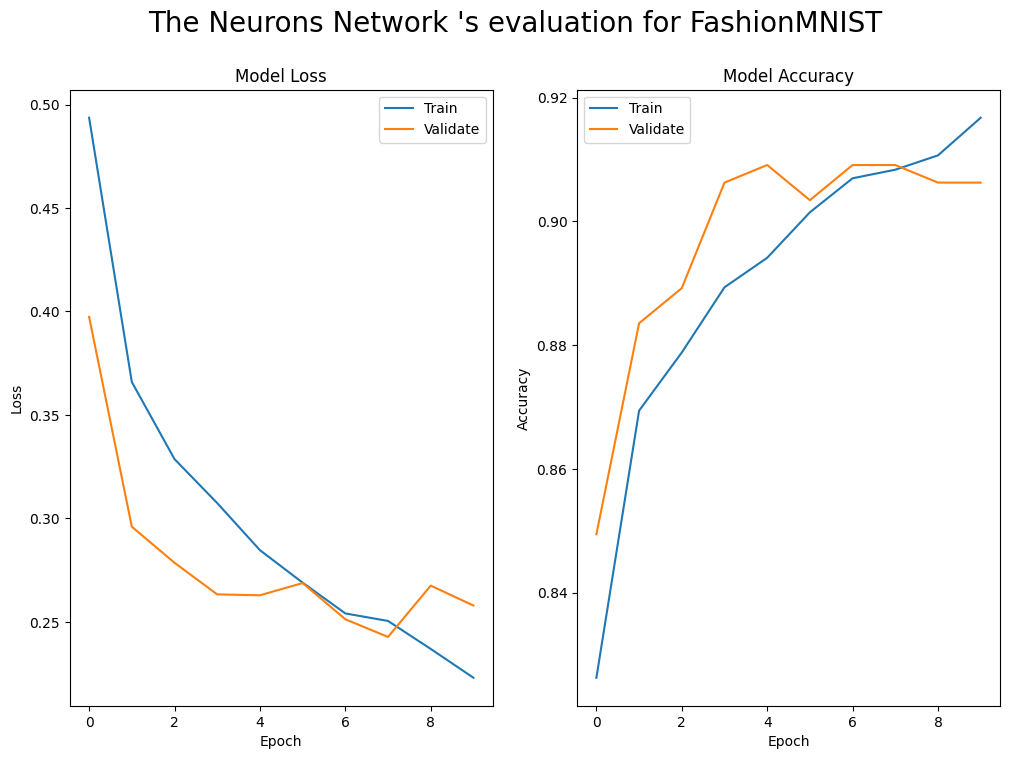

In [15]:
import matplotlib.pyplot as plt
fig,axes = plt.subplots(1,2, figsize=(12,8))
fig.suptitle("The Neurons Network 's evaluation for FashionMNIST ",fontsize=20)
axes[0].plot(history.history['loss'])
axes[0].plot(history.history['val_loss'])
axes[0].set_title('Model Loss')
axes[0].set_ylabel('Loss')
axes[0].set_xlabel('Epoch')
axes[0].legend(['Train','Validate'])


axes[1].plot(history.history['accuracy'])
axes[1].plot(history.history['val_accuracy'])
axes[1].set_title('Model Accuracy')
axes[1].set_ylabel('Accuracy')
axes[1].set_xlabel('Epoch')
axes[1].legend(['Train','Validate'])
plt.show()

In [16]:
import tqdm
testX = []
testY = []
for (image, label) in tqdm.tqdm(test_dataset.take(10000)):
    image = tf.convert_to_tensor(image)
    testX.append(image)
    testY.append(label)

testX = np.array(testX)
testY = np.array(testY)

testX.shape, testY.shape

100%|██████████| 10000/10000 [00:10<00:00, 973.01it/s]


((10000, 28, 28, 1), (10000,))

In [17]:
from sklearn.metrics import classification_report

Y_pred = model.predict_generator(testX, num_test_examples // BATCH_SIZE)
y_pred = np.argmax(Y_pred, axis=1)

print(classification_report(testY, y_pred, target_names=class_names))

<ipython-input-17-e4cbea3b5a43>:3: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  Y_pred = model.predict_generator(testX, num_test_examples // BATCH_SIZE)


              precision    recall  f1-score   support

 T-shirt/top       0.86      0.81      0.83      1000
     Trouser       1.00      0.96      0.98      1000
    Pullover       0.82      0.76      0.79      1000
       Dress       0.84      0.91      0.87      1000
        Coat       0.77      0.83      0.80      1000
      Sandal       0.95      0.97      0.96      1000
       Shirt       0.69      0.70      0.70      1000
     Sneaker       0.94      0.95      0.95      1000
         Bag       0.99      0.94      0.97      1000
  Ankle boot       0.97      0.94      0.96      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



<Figure size 1000x300 with 0 Axes>

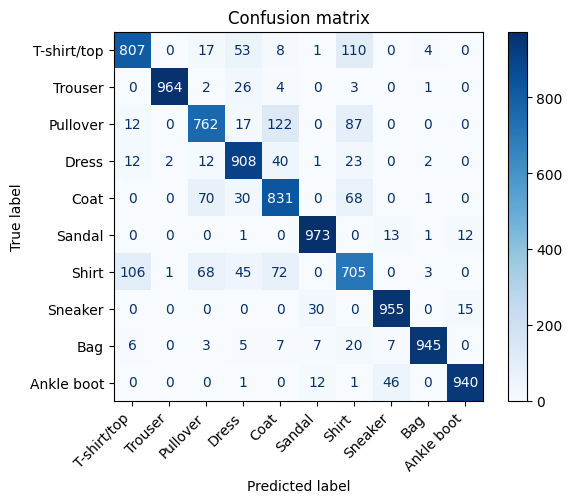

In [18]:
from sklearn.metrics import ConfusionMatrixDisplay
# Plot non-normalized confusion matrix
plt.figure(figsize=(10,3))

disp = ConfusionMatrixDisplay.from_predictions(
    testY, y_pred,
    display_labels=class_names,
    cmap=plt.cm.Blues,
    normalize=None,
)
disp.ax_.set_title("Confusion matrix")

# print(disp.confusion_matrix)
# Rotate x-axis labels
disp.ax_.set_xticklabels(disp.ax_.get_xticklabels(), rotation=45, ha='right')

plt.show()

In [19]:
test_dataset = test_dataset.cache().batch(BATCH_SIZE)

test_loss, test_accuracy = model.evaluate(test_dataset, steps=math.ceil(num_test_examples/32))
print('Accuracy on test dataset:', test_accuracy)

313/313 [==============================] - 2s 6ms/step - loss: 0.3484 - accuracy: 0.8790
Accuracy on test dataset: 0.8790000081062317
